# CO2 Emission Prediction

## Data Loading

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/208/original/CO2_Emissions.csv?1760012266

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/208/original/CO2_Emissions.csv?1760012266
To: /content/CO2_Emissions.csv?1760012266
100% 476k/476k [00:00<00:00, 549kB/s]


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("CO2_Emissions.csv")

In [ ]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

## Exploratory Data Analysis

In [ ]:
# Basic structure
print(df.shape)
print(df.info())
print(df.dtypes)

(7385, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  


Text(0.5, 1.0, 'Distribution of CO2 Emissions')

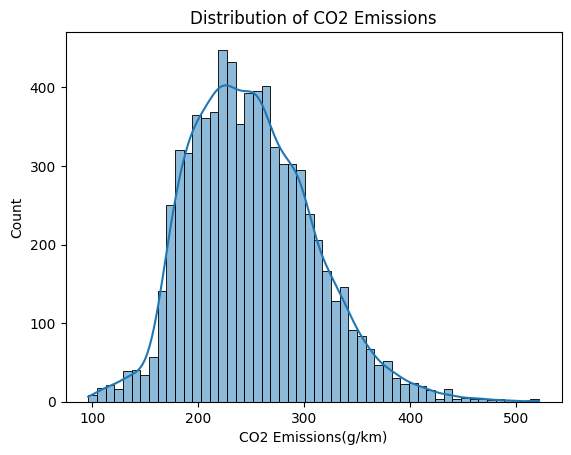

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CO2 Emissions(g/km)'], kde=True)
plt.title('Distribution of CO2 Emissions')

Text(0.5, 1.0, 'Boxplot of CO2 Emissions')

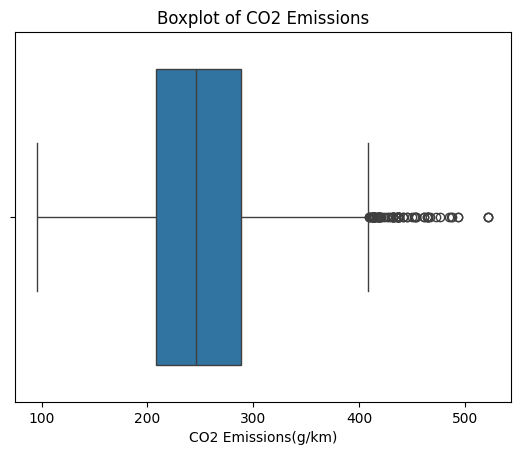

In [ ]:
sns.boxplot(x=df['CO2 Emissions(g/km)'])
plt.title('Boxplot of CO2 Emissions')

### Univariate Analysis of Numerical Features

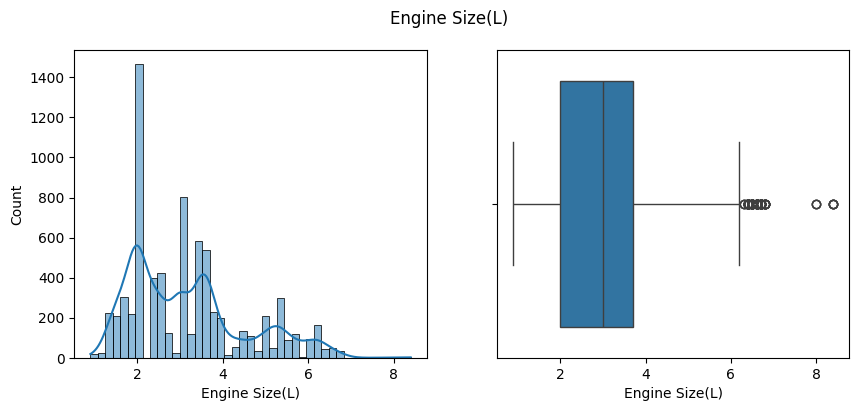

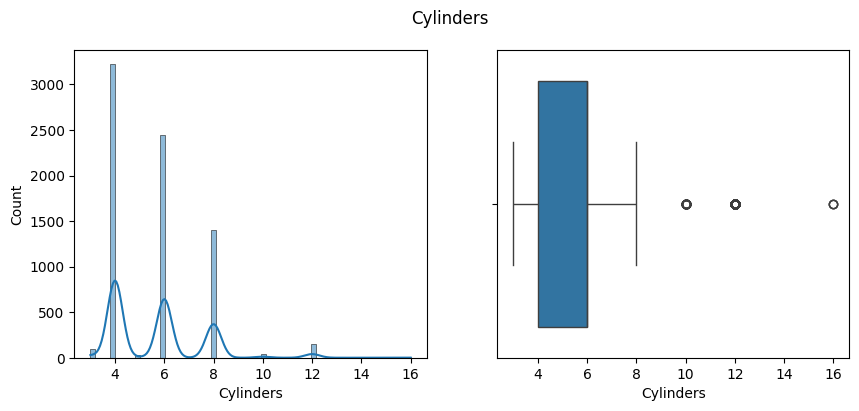

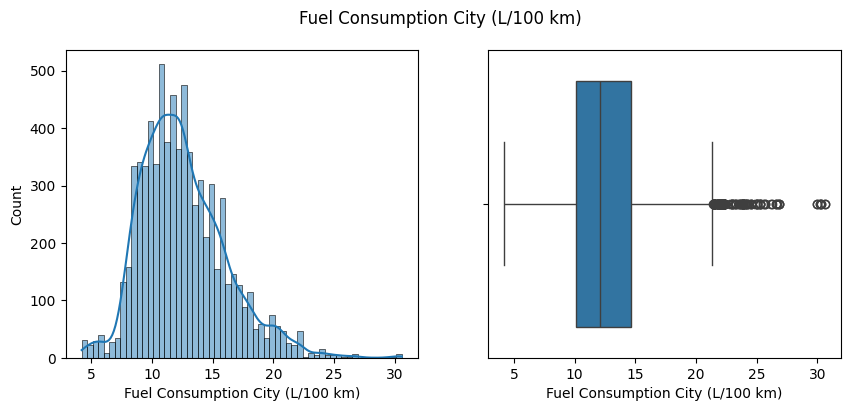

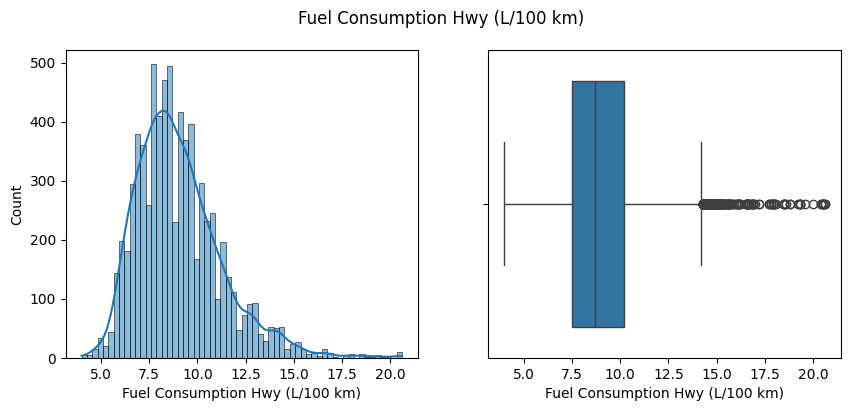

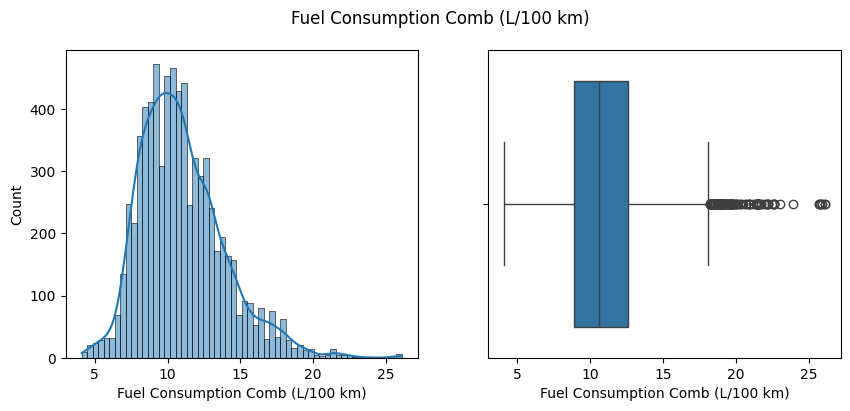

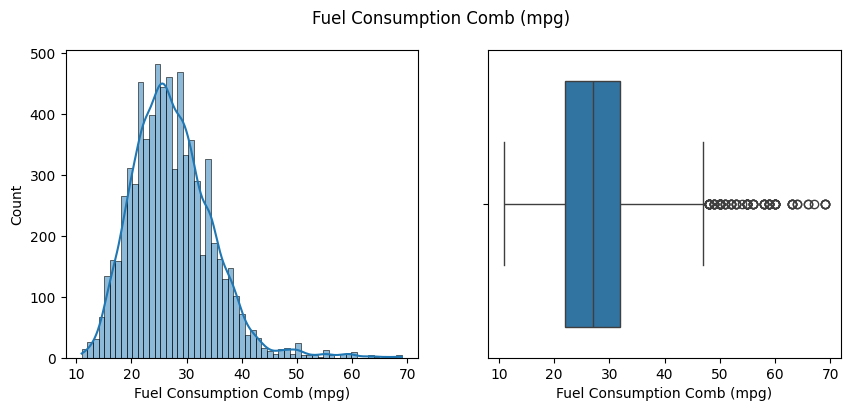

In [ ]:
num_cols = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)',
            'Fuel Consumption Comb (mpg)']

for col in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(df[col], kde=True, ax=ax[0])
    sns.boxplot(x=df[col], ax=ax[1])
    plt.suptitle(col)
    plt.show()


### Univariate Analysis of Categorical Features

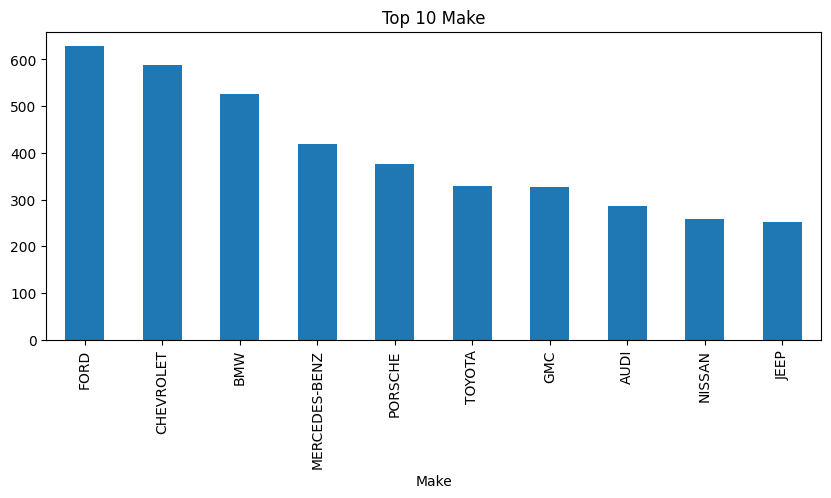

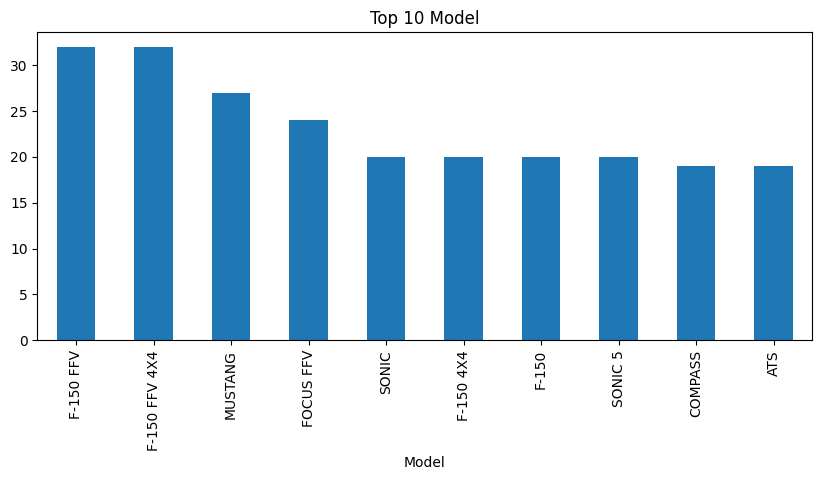

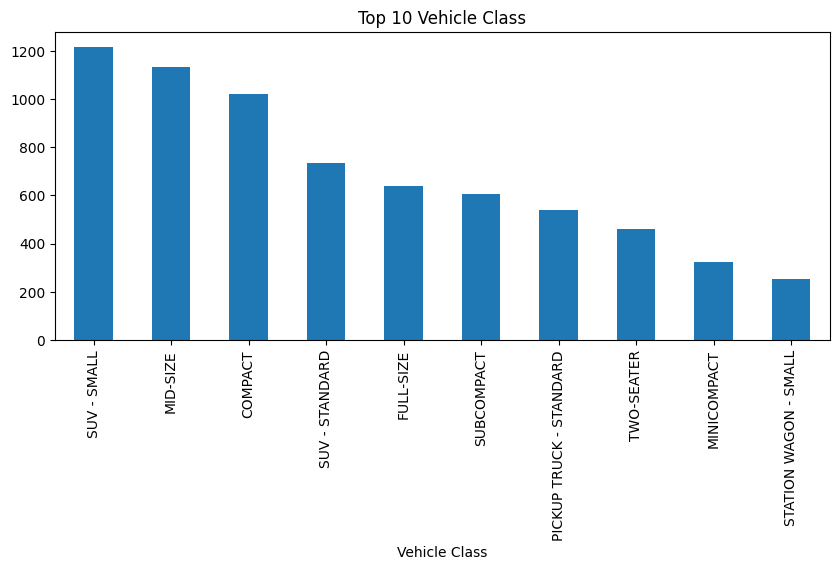

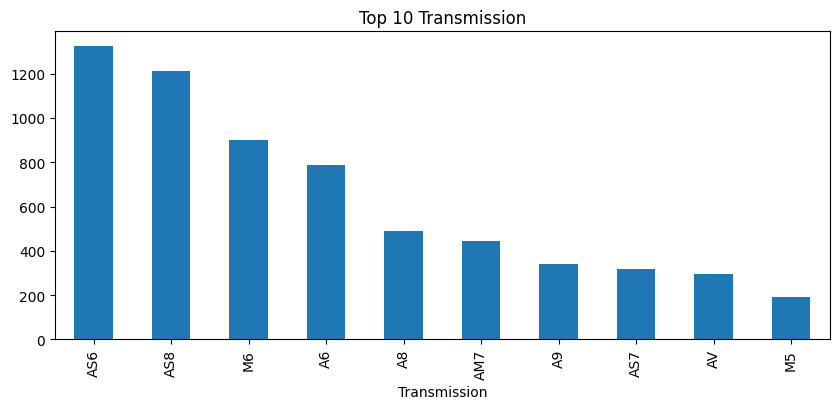

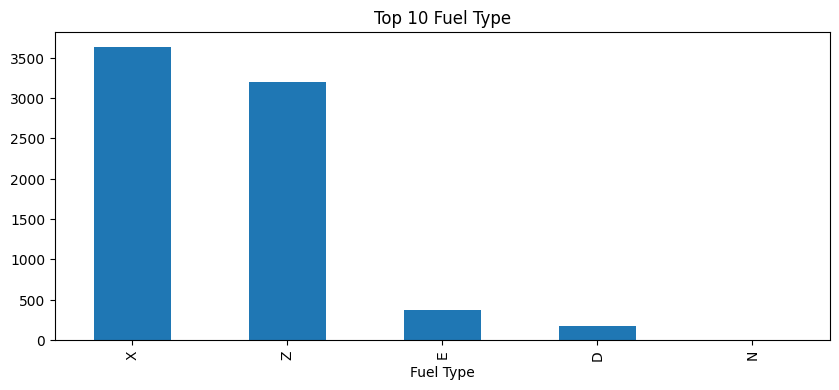

In [ ]:
cat_cols = ['Make','Model','Vehicle Class','Transmission','Fuel Type']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.show()

### Bivariate Analysis of Numerical Features with targets

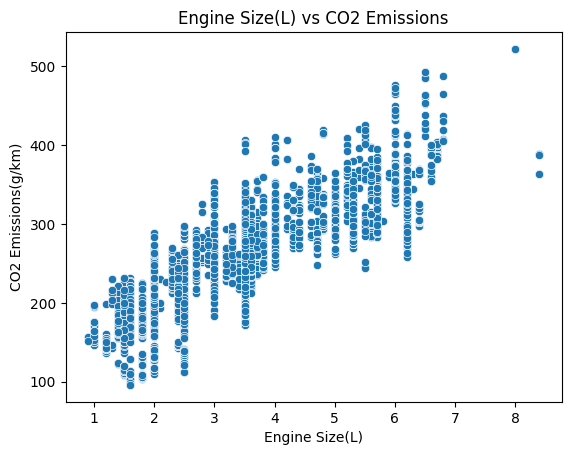

Engine Size(L) Correlation: 0.8511446437900007


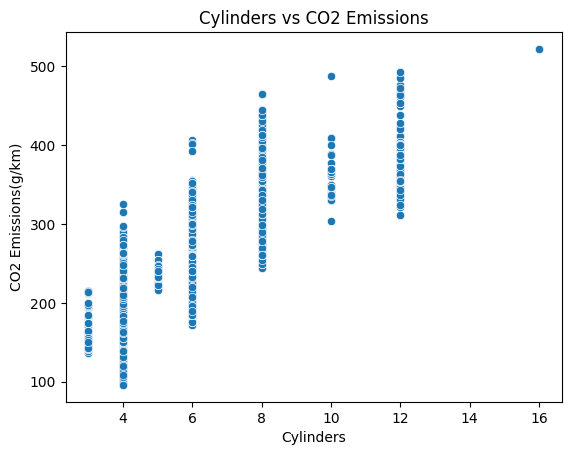

Cylinders Correlation: 0.832643600223776


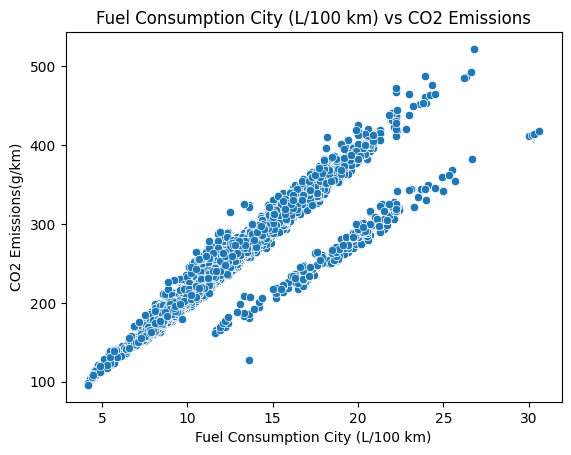

Fuel Consumption City (L/100 km) Correlation: 0.9195924749024846


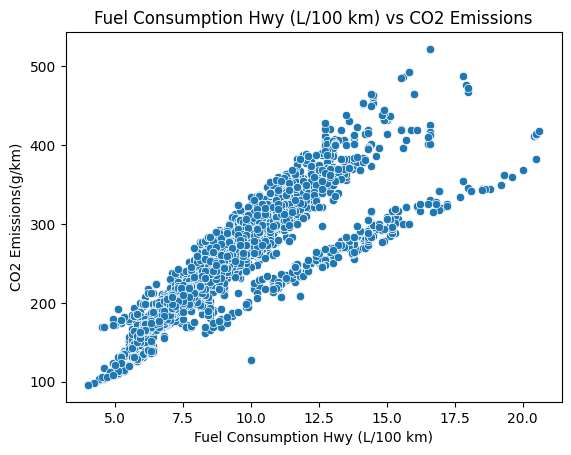

Fuel Consumption Hwy (L/100 km) Correlation: 0.8835359454649432


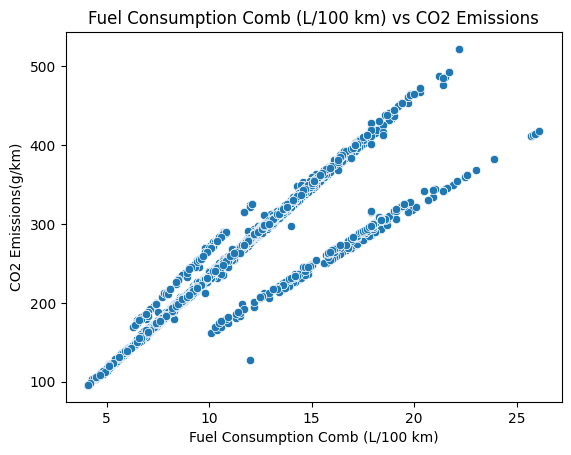

Fuel Consumption Comb (L/100 km) Correlation: 0.9180515723870847


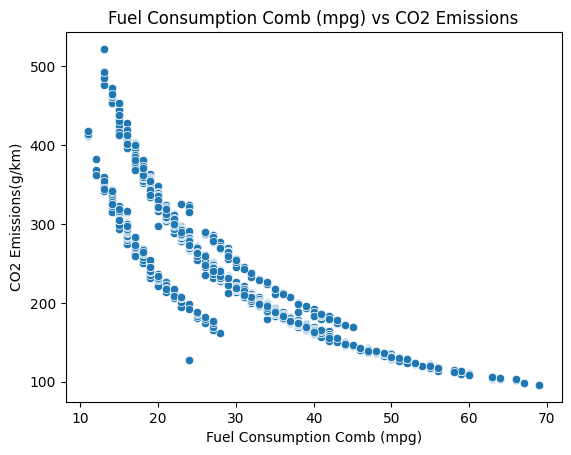

Fuel Consumption Comb (mpg) Correlation: -0.9074262866541868


In [ ]:
for col in num_cols:
    sns.scatterplot(x=df[col], y=df['CO2 Emissions(g/km)'])
    plt.title(f'{col} vs CO2 Emissions')
    plt.show()

    corr = df[col].corr(df['CO2 Emissions(g/km)'])
    print(col, 'Correlation:', corr)

### Bivariate Analysis of Categorical Features with targets

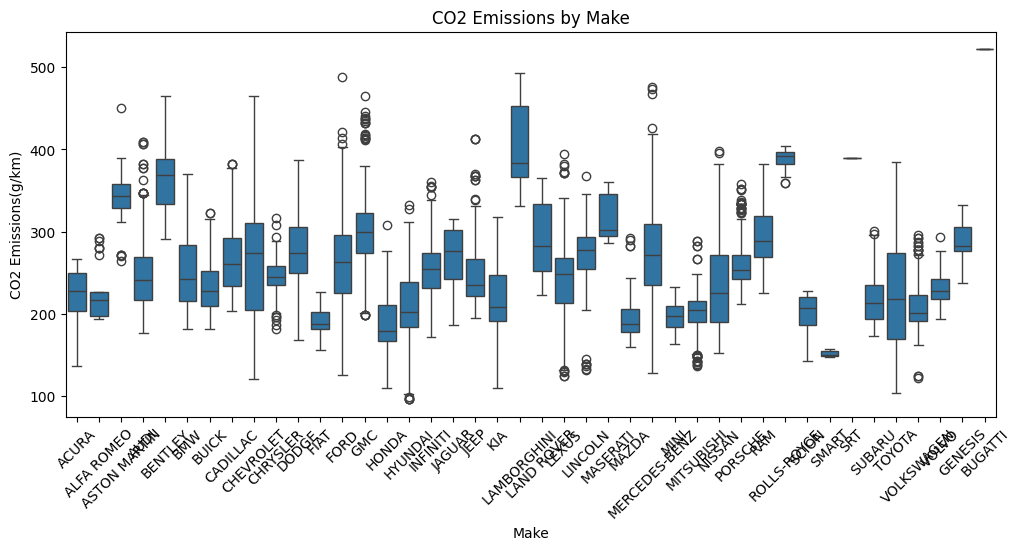

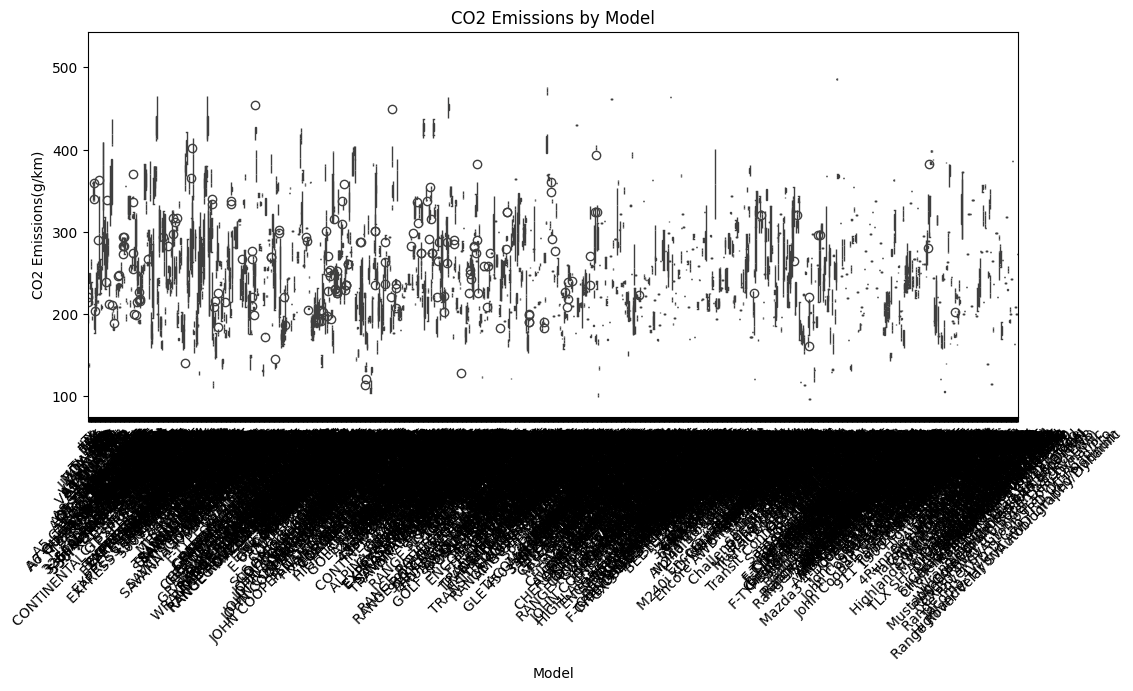

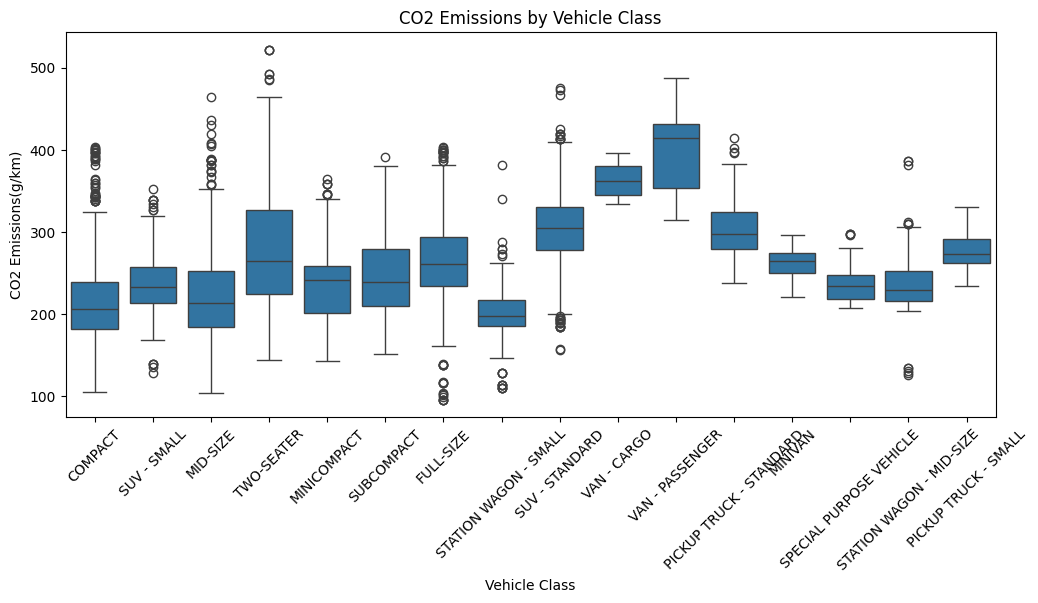

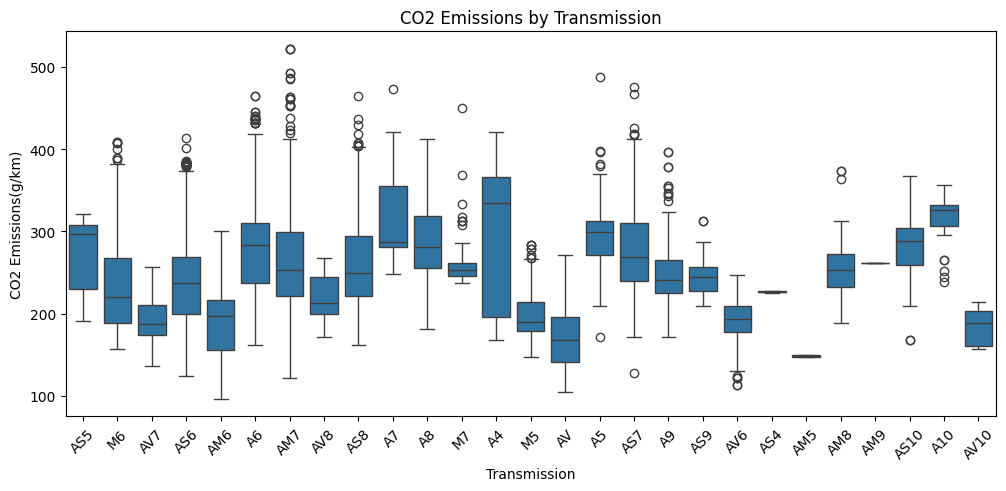

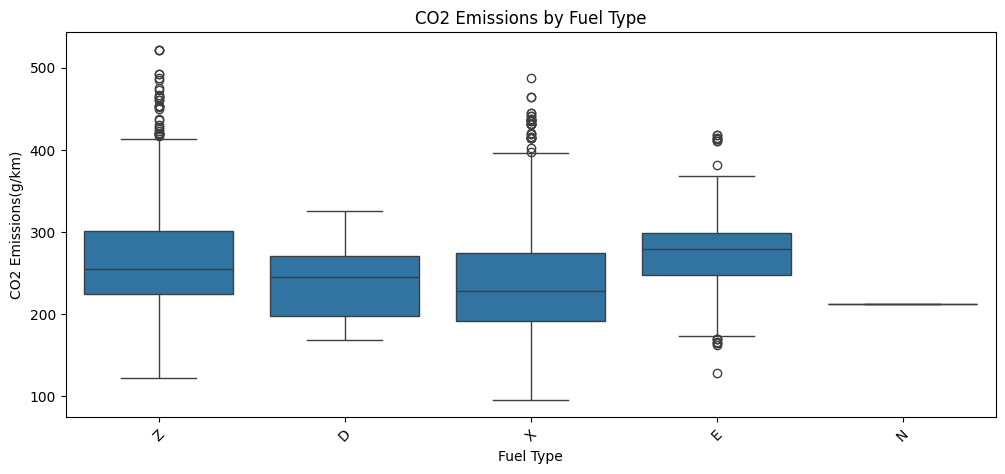

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=df[col], y=df['CO2 Emissions(g/km)'])
    plt.title(f'CO2 Emissions by {col}')
    plt.xticks(rotation=45)
    plt.show()


### Correlation Heatmap

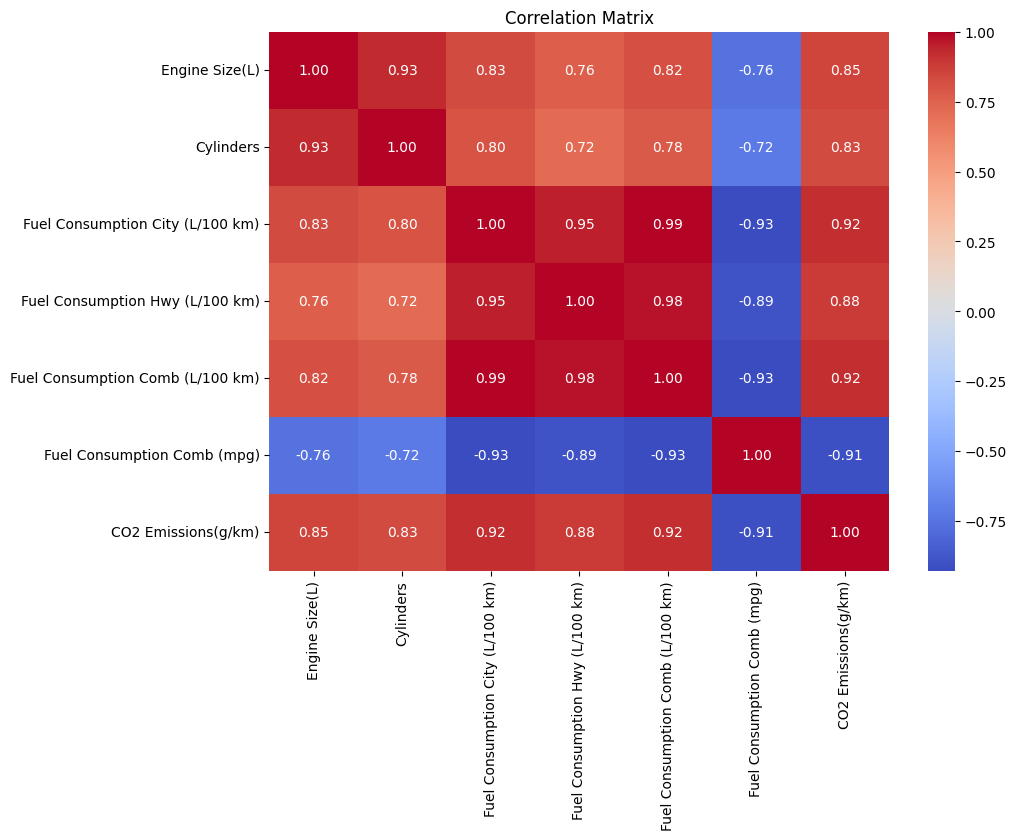

In [ ]:
import numpy as np

corr = df[num_cols + ['CO2 Emissions(g/km)']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Key Observations:


- Fuel Consumption City, Fuel Consumption Hwy, and Fuel Consumption Comb (L/100 km) are >0.95 correlated with each other.

- Engine Size(L) and Cylinders are ~0.93 correlated.

- Fuel Consumption Comb (mpg) is strongly negatively correlated (~–0.9) with the other fuel consumption features (because it’s the inverse metric).


What this means:

- Including all these features together will break linear regression assumptions (high VIF and unstable coefficients).

- PCA can reduce dimensionality, but it produces abstract principal components that lose physical interpretability.

### Outlier Detection & Capping

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers per feature:", outliers)


Outliers per feature: [  8 154  56  74  64  92]


In [ ]:
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)


## Multi Co-linearity check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                            Feature           VIF
0                    Engine Size(L)     55.787046
1                         Cylinders     80.168994
2  Fuel Consumption City (L/100 km)  17868.933697
3   Fuel Consumption Hwy (L/100 km)   6408.529346
4  Fuel Consumption Comb (L/100 km)  44844.739206
5       Fuel Consumption Comb (mpg)      7.441614


#### There is a huge multi collinearity

To counter this problem we can either use PCA or just drop some redundant features

## Feature Engineering

In [ ]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

numeric_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)']
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
target = 'CO2 Emissions(g/km)'

X = df[numeric_features + categorical_features]
y = df[target]

## Train Test splitting & Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Pre-processing & model pipelining

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)




In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10))
])



## model training & prediction

In [ ]:
# If you used a pipeline or PCA transformer
X_train_array = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_array = X_test.toarray() if hasattr(X_test, "toarray") else X_test

model.fit(X_train_array, y_train)
y_pred = model.predict(X_test_array)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

MAE:  3.13
RMSE: 5.28
R²:   0.992


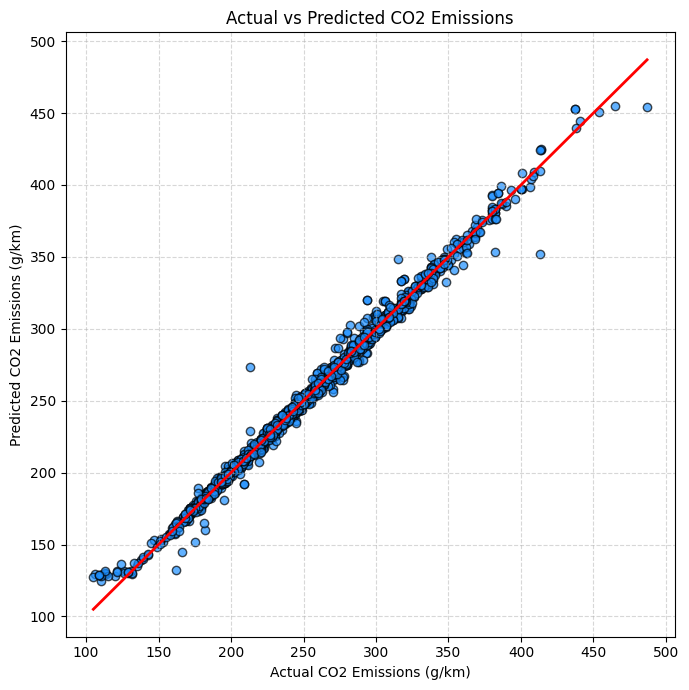

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2)  # ideal line
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Feature Importance

In [ ]:
# Get feature names after preprocessing
feature_names = (numeric_features +
                list(model.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['encoder']
                    .get_feature_names_out(categorical_features)))

# Get coefficients
coefficients = model.named_steps['regressor'].coef_
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

In [ ]:
print(feature_importance)

                               Feature  Coefficient
2009                       Fuel Type_E   -81.332370
0     Fuel Consumption Comb (L/100 km)    60.599538
2008                       Fuel Type_D    43.826300
2011                       Fuel Type_Z    19.068726
2010                       Fuel Type_X    18.437345
...                                ...          ...
331      Model_AMG GLC 43 4MATIC Coupe     0.001598
1472          Model_Range Rover Evoque    -0.001083
1586       Model_SILVERADO eASSIST 4WD     0.000475
343            Model_AMG GT C Roadster    -0.000183
342               Model_AMG GT C Coupe    -0.000183

[2012 rows x 2 columns]


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(model, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'regressor__alpha': 1}


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train,
                            cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

Cross-validation R² scores: [0.99266327 0.99044847 0.99055372 0.99294375 0.98944437]
Mean CV R²: 0.991 (+/- 0.001)


## Error Analysis

In [ ]:
# Find worst predictions
errors = np.abs(y_test - y_pred)
worst_predictions = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': errors
}).nlargest(10, 'Error')

print("Top 10 worst predictions:")
print(worst_predictions)

Top 10 worst predictions:
      Actual   Predicted      Error
2439     213  291.008026  78.008026
228      413  357.799529  55.200471
6045     487  434.400446  52.599554
472      294  337.154005  43.154005
478      294  337.154005  43.154005
3286     270  230.419902  39.580098
3139     270  230.419902  39.580098
4740     288  248.555429  39.444571
4739     288  248.555429  39.444571
1554     282  321.033537  39.033537


## Model Testing

In [ ]:
def predict_co2(engine_size, fuel_consumption, make, vehicle_make,
                vehicle_class, transmission, fuel_type):
    input_data = pd.DataFrame({
        'Fuel Consumption Comb (L/100 km)': [fuel_consumption],
        'Engine Size(L)': [engine_size],
        'Make': [make],
        'Model': [vehicle_make],  # renamed to avoid confusion
        'Vehicle Class': [vehicle_class],
        'Transmission': [transmission],
        'Fuel Type': [fuel_type]
    })

    prediction = model.predict(input_data)[0]
    return prediction

In [ ]:
# Test the function
predicted_emission = predict_co2(
    engine_size=6.0,
    fuel_consumption=8.7,
    make="ACURA",
    vehicle_make="ILX",
    vehicle_class="SUV - SMALL",
    transmission="AUTOMATIC",
    fuel_type="GASOLINE"
)

print(f"Predicted CO2 Emission: {predicted_emission:.2f} g/km")

Predicted CO2 Emission: 191.66 g/km
